# Homework 2

Due on Friday Sep 29 by midnight.

1. **Integration errors**

In the class exercises on integration, we knew the function we were integrating, so we could calculate the error in our numerical integrations by comparing with the analytic answer for the integral. However, in real situations where you have a tabulated function to integrate without knowing the underlying analytic function, how do we estimate the error? One method is to see how much the numerical integral changes when you change the number of points. For example, if you have $N$ function evaluations with spacing $\Delta x$, you can calculate the integral using all $N$ points, and then again using approximately half the points to increase the spacing to $2\Delta x$. Comparing the values of the two integrals gives an estimate of the error. You'll work through this idea in this question.

(a) First, explain why the errors associated with the trapezoidal rule and Simpson's rule scale $\propto (\Delta x)^2$ and $(\Delta x)^4$ respectively.



In [67]:
import numpy as np, matplotlib.pyplot as plt, scipy

In [68]:
# Functions:
def trapezoidal(xi,xf,N,func): # trapezoidal's rule
    dx = (xf-xi)/(N-1)
    x = np.linspace(xi,xf,N)
    f = func(x)
    return np.sum(f[1:-1]*dx) + 0.5*dx*(f[0]+f[-1]) 

def simpson(xi,xf,N,func): # simpson's rule
    dx = (xf-xi)/(N-1)
    x = np.linspace(xi,xf,N)
    f = func(x)
    return (np.sum(4*f[1:-1:2]*dx) + np.sum(2*f[2:-1:2]*dx) + f[0]*dx + f[-1]*dx)/3

def fun(x): # function to integrate
    return 1/x

# Initial parameters
xi = 1
xf = 10
N = 10000

# Actual integration
I1_trap = trapezoidal(xi,xf,N,fun)
I2_trap = trapezoidal(xi,xf,int(N/2),fun)
I1_simp = simpson(xi,xf,N,fun)
I2_simp = simpson(xi,xf,int(N/2),fun)

In [69]:
# Relative error calculation
I = np.log(xf)-np.log(xi) # actual value of integral
e_trap1  = abs(I1_trap - I)
e_trap2  = abs(I2_trap - I)
e_simp1 = abs(I1_simp - I)
e_simp2 = abs(I2_simp - I)
print(e_trap1)
print(e_trap2)
print(f'Trapezoidal. The ratio between the error for spacing 2dx and dx is {e_trap2/e_trap1}')
print(e_simp1) 
print(e_simp2)
print(f'Simpson. The ration between the error for spacing 2dx and dx is {e_simp2/e_simp1}')

6.683836106802232e-08
2.6740686420723137e-07
Trapezoidal. The ratio between the error for spacing 2dx and dx is 4.0007992406499575
3.000435054856254e-05
6.0017404211354375e-05
Simpson. The ration between the error for spacing 2dx and dx is 2.0002900617433865


Through the Euler-Maclaurin summation formula we can find the asymptotic error estimate for the trapezoidal rule and the composite Simpson's rule:
$$\epsilon_{trapezoidal} = -\frac{(b-a)^2}{12N^2}[f'(b)-f'(a)]+O(N^{-3})=-\frac{(\Delta x)^2}{12}[f'(b)-f'(a)]+O(N^{-3})$$
$$\epsilon_{simpson} = -\frac{(b-a)(\Delta x)^4}{180}[f^{(4)}\xi]$$
where $\xi$ is some number between a and b.
We can see that the errors associated with both methods scale $\propto (\Delta x)^2$ and $(\Delta x)^4$, respectively

(b) If the value for the integral when all the points are used (spacing $\Delta x$) is $I_1$, and the value for the integral when half the points are used (spacing $2\Delta x$) is $I_2$, show that the error in $I_1$ can be written 

$$\epsilon_1\approx {I_1-I_2\over 3}$$

for the trapezoidal rule, and 

$$\epsilon_1\approx {I_1-I_2\over 15}$$

for Simpson's rule. [*Hint*: write the true value of the integral as $I=I_1+\epsilon_1=I_2+\epsilon_2$ and use the fact that you know how the errors scale with $\Delta x$.]



In [70]:
e_1_trap = np.abs(I1_trap - I2_trap)/3
e_1_simp = np.abs(I1_simp - I2_simp)/15
# Verification of true value of integral
print(f'Trapezoidal. The error we get using for I1 using the procedure above is {e_1_trap}, while the actual error is {np.abs(I-I1_trap)}.')

print(f'Simpson. The error we get using for I1 using the procedure above is {e_1_simp}, while the actual error is {np.abs(I-I1_simp)}.')


Trapezoidal. The error we get using for I1 using the procedure above is 6.685616771306968e-08, while the actual error is 6.683836106802232e-08.
Simpson. The error we get using for I1 using the procedure above is 2.000870244186122e-06, while the actual error is 3.000435054856254e-05.


For the trapezoidal rule, we know that if we double $\delta x$, then the error we will get is going to be 4 times bigger! 
We can write the value of the integral as $I=I_1+\epsilon_1=I_2+\epsilon_2$, solving for $\epsilon_1$ and considering that $\epsilon_2 \approx 4\epsilon _1$, we then have 
$$\epsilon_1\approx {I_1-I_2\over 3}$$
Now, for the Simpson's rule, if we double $\delta x$, then the error is going to be 16 times bigger, doing the same process as we just did, gives us:
$$\epsilon_1\approx {I_1-I_2\over 15}$$.

Above, we can also see an example of the implementation of this procedure to find the error of integrating 1/x between the established range of x values. The results are that this procedure is a good approximation to the actual error!



(c) The file [`hw2_data.txt`](https://github.com/andrewcumming/phys512/blob/main/hw2_data.txt) has 21 samples of a function $f(x)$ between $x=1$ and $x=2$. Column 1 in the file gives the $x$ values and column 2 the corresponding $f(x)$ values.  Write a code that reads in the data from the file, integrates the function from $x=1$ to $x=2$, and then carries out the procedure above to estimate the error in the integration. [*Hint*: One option to read in the data is to use  [`numpy.loadtxt`](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html) which can read the data straight into numpy arrays.]

Do this for both the trapezoidal and Simpson's rules. Discuss whether the answer you get for the error makes sense given what you know about the accuracy of the trapezoidal rule and Simpson's rule.

In [71]:
# Load data and define our variables
a = np.loadtxt('hw2_data.txt')
x = np.array([i[0] for i in a])
y = np.array([i[1] for i in a])
y2 = y[0::2]

dx = x[1]-x[0]
dx2 = 2*dx

# Integration methods
I1_trap = np.sum(y[1:-1]*dx) + 0.5*dx*(y[0]+y[-1]) 
I2_trap = np.sum(y2[1:-1]*dx2) + 0.5*dx2*(y2[0]+y2[-1]) 
I1_simp = (np.sum(4*y[1:-1:2]*dx) + np.sum(2*y[2:-1:2]*dx) + y[0]*dx + y[-1]*dx)/3
I2_simp = (np.sum(4*y2[1:-1:2]*dx2) + np.sum(2*y2[2:-1:2]*dx2) + y2[0]*dx2 + y2[-1]*dx2)/3

# Error calculation
e_trap = np.abs(I1_trap - I2_trap)/3
e_simp = np.abs(I1_simp - I2_simp)/15
print(e_trap)
print(e_simp)


0.0006157881000475504
4.379908454321679e-06


Here, we have implemented two methods of integration: trapezoidal and Simpson's rules. Comparing the error for both methods, we can see that Simpson's rule has more accuracy to find the integral, this checks out with what I know about the because the trapezoidal rule is only bounded to the average of the left and irght hand of the Riemann sums.

(d) Because I generated the data points in the file, I know the true underlying function and its integral -- the true value of the integral is `1.482974344768713` (as obtained by `scipy.integrate.quad`). Use this value to calculate the true error of the trapezoidal and Simpson's rule integrals and compare with your estimate from part (c). Does our estimate procedure from part (b) do a good job at estimating the error?



In [72]:
quad = 1.482974344768713
true_error_trap = np.abs(I1_trap - quad)
true_error_simp = np.abs(I1_simp - quad)
print(true_error_trap)
print(true_error_simp)

0.0006196155086970467
3.82740864957043e-06


We see that our estimate procedure from part (b) doing a good job for this case, just as it did for the other case where 1/x was integrated above.

(e) *Optional*: An extension of this question is to use this idea to write an adaptive integrator that takes a function $f(x)$ and iteratively increases the number of integration points until a specified precision is reached.


2. **Chemical potential of a Fermi gas** 

In statistical mechanics, the chemical potential $\mu$ of a gas of $N$ non-interacting fermions in a volume $V$ is given by the integral

$$N = V \int_0^\infty {8\pi p^2 dp\over h^3} {1\over 1+e^{(\epsilon-\mu)/k_BT}},$$

where you can assume that the particles are non-relativistic so $p = \sqrt{2m\epsilon}$. The goal in this question is to numerically invert this integral to return the chemical potential $\mu$ as a function of number of particles $N$ and temperature $T$.

(a) Numerically evaluate the integral for different values of $\mu/k_BT$ (from large and negative to large and positive) and set up an interpolating function that returns $\mu/k_BT$ as a function of $N/n_QV$ where 
$n_Q=(m k_BT/2\pi\hbar^2)^{3/2}$. [You may find it helpful to simplify the integral first, for example to write the integration variable as $x=\epsilon/k_BT$.]



By introducing new variables, namely:
$$p = \sqrt(2m\epsilon)$$
$$x=\frac{\epsilon}{k_BT}$$
$$\hbar=\frac{h}{2\pi}$$
$$n_Q=\frac{mk_BT}{(2 \pi \hbar ^2)^{3/2}}$$
And rearranging terms in the integral. We get:
$$f(\frac{\mu}{k_bT})= \frac{N}{n_QV} = \frac{4}{\sqrt{\pi}}\int^{\infty}_0 \sqrt{x} \frac{1}{1+e^{x-\frac{\mu}{k_BT}}}dx$$
In this expression, we can more easily set up an interpolating function that returns $\frac{\mu}{k_BT}$ as a function of $\frac{N}{n_qV}$.

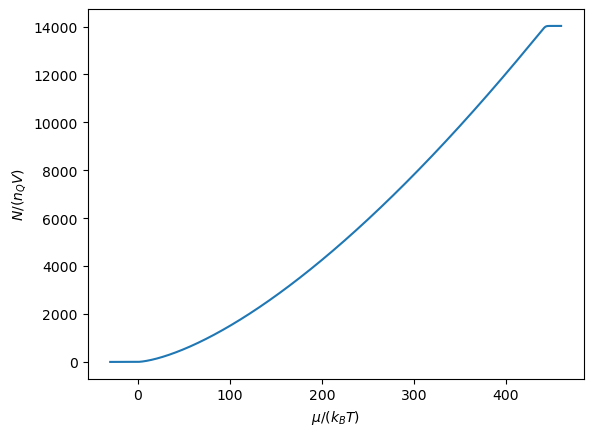

In [73]:
def fun(x,mu_kT):
    return np.sqrt(x) * 1/( 1 + np.exp(x-mu_kT))
V = 1
hbar = 1
m = 1
n_Q = m*k_B*T / (2*np.pi*hbar**2)**(3/2)
mu_max = 460
mu_min = -30
n = 1801 # number of mu/(k_B*T) values we're integrating over
mu_kT_values= np.linspace(mu_min,mu_max,n) # actual mu/(k_B*T) values we're integrating over
k_B = 1 
T = 1
mu_kT_max = mu_max/(k_B*T)
mu_kT_min = mu_min/(k_B*T)
values = np.zeros(n)

for i in range(n): # We integrate from mu_max to mu_min
    values[i] = 4/np.sqrt(np.pi)*scipy.integrate.quad(fun,0,443,args=(mu_kT_values[i],))[0]
# Plot of integration results
plt.plot(mu_kT_values, values)
plt.xlabel('$\mu/(k_B T)$')
plt.ylabel('$N/(n_QV)$')
#np.array([values,mu_kT_values])
interpol = scipy.interpolate.RegularGridInterpolator((values,),mu_kT_values) # interpolating function
N = 14028 # maximum number of particles
x = np.linspace(1,N,N) # array of number of particles N

We can observe that for large values of $\frac{\mu}{k_bT}$, there's a maximum value we get around 14028.11 While, for large, negative values, we get a minimum value of 0.

Text(0, 0.5, '$\\mu$')

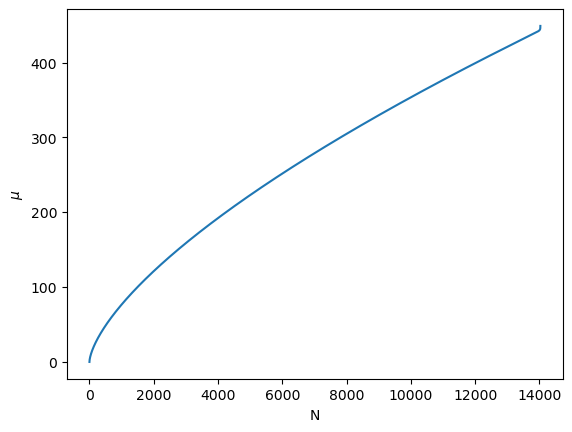

In [74]:
mu = interpol(x)*k_B*T # mu as a function of N and T
plt.plot(mu)
plt.xlabel('N')
plt.ylabel('$\mu$')

In [75]:
mu_final = interpol([x[-1]])
error = (mu_final - 1/4*(3*np.sqrt(np.pi)*x[-1])**(2/3) )/ (1/4*(3*np.sqrt(np.pi)*x[-1])**(2/3))*100
accuracy = 100-error
print(accuracy)

[98.64253034]


(b) Assess the errors in your calculation: describe the sources of error and estimate the accuracy of your final value of $\mu(N, T)$.

For T = 1 and a final value of N=5333. We have obtained $\mu=404.12788$. Compared to the analytic result, we have obtained an accuracy of 98.6%.
The sources error for this final calculation are:

    1. The numerical integration from scipy.integrate.quad function
    
    2. The linear interpolation from scipy.interpolate.RegularGridInterpolator
    
    3. The number of points we're working with and their discretization

(c) Compare your results with the analytic limits of non-degenerate $\mu = k_BT \ln (n/2n_Q)$ and degenerate $\mu=E_F$ fermions (where $E_F = p_F^2/2m$ with $p_F=\hbar(3\pi^2 n)^{1/3}$ is the Fermi energy). Determine the region of parameter space where each of these limits is accurate to 1\%. 

From the equations, we can solve for $\frac{\mu}{k_BT}$ so we can more easily compare the analytic results with our numerical ones. 

For the non-degenerate case, we get:
$$\frac{\mu}{k_BT}=ln(\frac{N}{2n_QV})$$
And, for the degenerate case, we get:
$$\frac{\mu}{k_BT} = \frac{1}{4}(3\sqrt\pi\frac{N}{n_QV})^{2/3}$$

Below, we compare our results with both analytic limits.

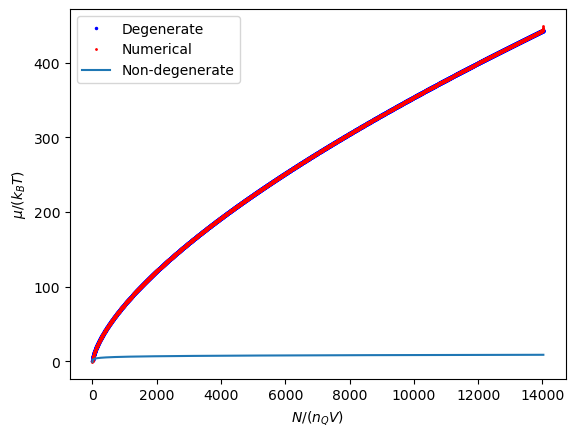

In [76]:
mu_non_degenerate = np.log(x/2)
mu_degenerate = 1/4*(3*np.sqrt(np.pi)*x)**(2/3)
#print(mu_non_degenerate)
#print(mu_degenerate)
plt.plot(x,mu_degenerate, 'bo',label='Degenerate',ms=1.5)
plt.plot(x,mu,'ro',label='Numerical',ms=1)
plt.plot(x,mu_non_degenerate,label='Non-degenerate')
plt.xlabel('$N/(n_QV)$')
plt.ylabel('$\mu/(k_BT)$')
plt.legend()
plt.show()

In this case, it wasn't possible to obtain a region of parameter space where each of these limits was accurate to 1%. But, we managed to obtain an accuracy of 1.33-2% for the case of degenerate fermions. The region itself is shown below in the figure:

Text(0, 0.5, '$\\mu/(k_BT)$')

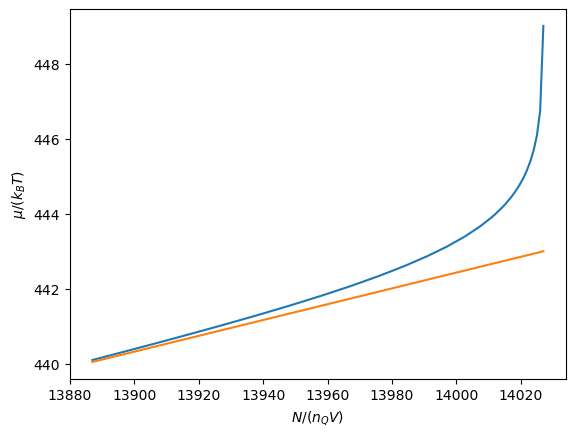

In [77]:
error_non_degenerate = np.abs(mu_final-mu_non_degenerate)/mu_final*100
error_degenerate = np.abs(mu_final-mu_degenerate)/mu_final*100
#plt.plot(relative_error2)
#plt.ylim([0,100])
indices = [i for i,v in enumerate(error_degenerate) if v < 2]
plt.plot(indices,mu[indices]);
plt.plot(indices,mu_degenerate[indices])
plt.xlabel('$N/(n_QV)$')
plt.ylabel('$\mu/(k_BT)$')

We can observe, that our numerical results are close to the analytic limit of degenerate fermions, having a relative error of 1.357%.


3. **Sampling the Maxwell-Boltzmann distribution**

(a) Write a function `MaxwellBoltzmann(N)` that returns a numpy array containing `N` samples of velocity from a 3D Maxwell-Boltzmann distribution. Your function (1) should be based on [`numpy.random.Generator.uniform`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.uniform.html) or equivalent that samples a uniform probability distribution, and (2) should not use any for loops. You should be able to generate a million samples in less than a second of runtime. In your answer, explain your algorithm.



The probability distribution function for the Maxwell-Boltzmann Speed distribution in 3D is 
$$f(v) = 4\pi v^2(\frac{m}{2\pi k_B T})^{3/2} exp(-\frac{mv^2}{2k_BT})$$

In [78]:
N = int(1e6)
k_B = 1
T = 1
m = 1

def plot_distribution(x, func):
    plt.clf()
    plt.hist(x, density=True, bins=100, histtype = 'step',label='Sampling')
    xx = np.linspace(0.0,max(x),100)
    plt.plot(xx, func(xx),':',label='Analytic')
    plt.yscale('log')
    plt.xlabel('x')
    plt.show()
def distribution(v):
    return 4*np.pi*v**2 * (m/(2*np.pi*k_B*T))**(3/2) * np.exp(-m*v**2/(2*k_B*T))
def MaxwellBoltzmann(N):
    x_r = 5*np.random.default_rng().uniform(0,1,N*6)
    y_r = np.random.default_rng().uniform(0,1,N*6)
    f = distribution(x_r)
    idx = np.where(y_r < f)[0] # indices of elements to be kept
    x = x_r[idx] # accepted points
    x = x[:N]
    return x
f = MaxwellBoltzmann(N)
len(f)

1000000

Here we have a simple algorithm that uses the rejection method in order to generate samples following the Maxwell-Boltzmann distribution. First, it generates an extra amount of points in order to ensure that we have N sampled points. Then, all of these random points are compared with the actual Maxwell-Boltzman probability function in order to see if they are rejected or not. We keep those values that are under it and then we keep only N of them.

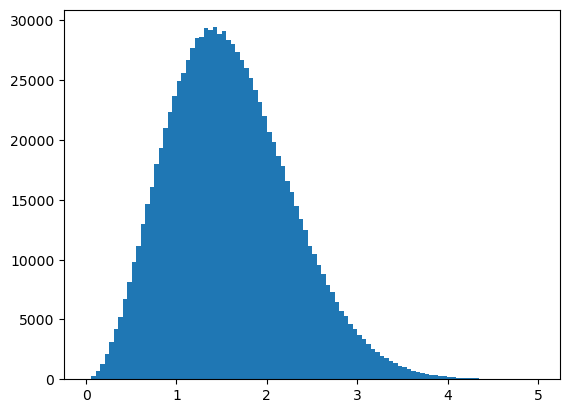

In [79]:
plt.hist(f,bins=100);



(b) Generate a large number of samples and compare a histogram of the velocities with the analytic distribution on a log-log plot. [You can use [`matplotlib.pyplot.hist`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) to draw the histogram.]



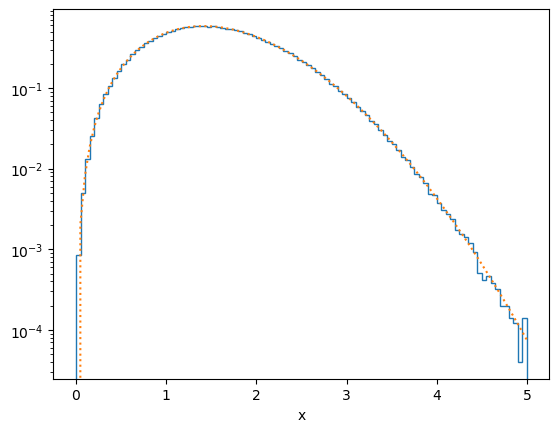

In [80]:
plot_distribution(f,distribution)

Here we have created 1 million samples and we are comparing a histogram of these velocity samples with the analytic distribution using a log-log plot. We can see that the sampling is doing a great job!

(c) Compute the average velocity of your sample, and compare with the analytic result $(8k_BT/\pi m)^{1/2}$. How does the error in the average velocity depend on the number of samples that you take from the distribution?

<!---
# 3. **Changing variables to handle an infinite range**
# -  Rational function fit used to fit a function with poles ?
# - Gauss Chebyshev quadrature
# - Select a particle 
-->

In [81]:
average_sampling = np.mean(f)
average = (8*k_B*T/(np.pi*m))**(1/2)
error = np.abs(average-average_sampling)
print(error)

0.0012857517151174669


In [82]:
samples = 10**np.linspace(1,6,100)
error1 = np.zeros(len(samples))
for i in range(len(samples-10)):
    error1[i] = np.abs(np.mean(MaxwellBoltzmann(i+10)) - average)


Text(0, 0.5, 'Error')

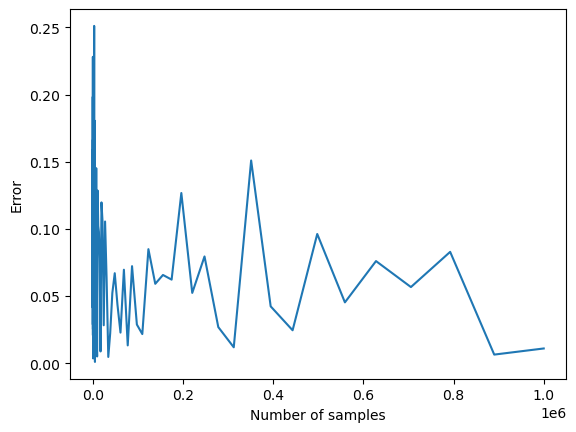

In [83]:
plt.plot(samples,error1)
plt.xlabel('Number of samples')
plt.ylabel('Error')

Initially, as we increase the number of samples, the error in our average velocity decreases in a significant way. This is expected to happen, as we get more values that are more aligned to the Maxwell-Boltzmann distribution, but this doesn't continue forever, there's a limit of points where we are not considering all the points that fit the gaussian, therefore the error is limited.